# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Importing the dataset

In [14]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Preliminary Data Exploration

### Catigorical variables 

In [3]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [4]:
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [5]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [6]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

### Weight feature boxplots for each obesity level

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

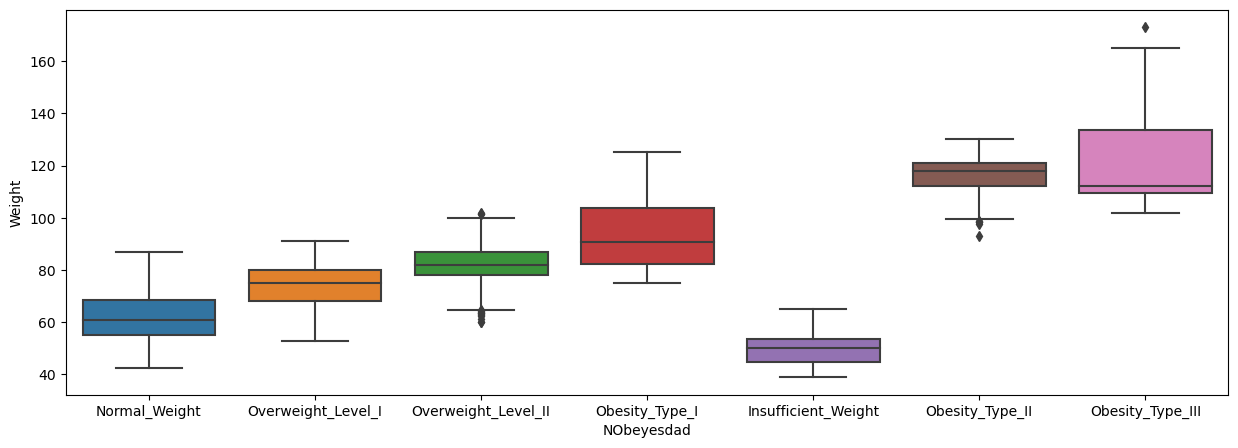

In [15]:
plt.figure(figsize = (15,5))
sns.boxplot(x="NObeyesdad", y="Weight", data=df)

### Age feature boxplots for each obesity level

<Axes: xlabel='NObeyesdad', ylabel='Age'>

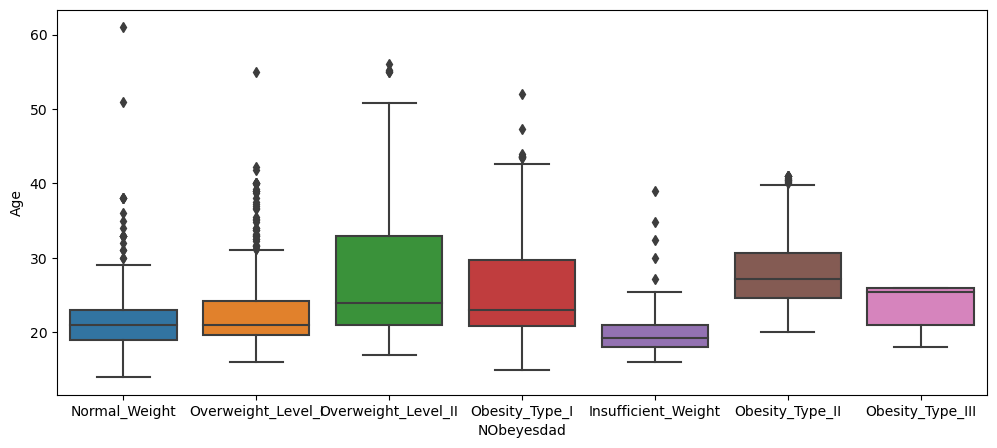

In [16]:
plt.figure(figsize = (12,5))
sns.boxplot(x="NObeyesdad", y="Age", data=df)

## Handeling catigorical variables 

In [17]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
dummy_data = LabelEncoder()

# Dummy code the variables with 2 ctegories
df1 = df

df1["Gender"] = dummy_data.fit_transform(df["Gender"])
df1["family_history_with_overweight"] = dummy_data.fit_transform(df["family_history_with_overweight"])
df1["FAVC"] = dummy_data.fit_transform(df["FAVC"])
df1["SMOKE"] = dummy_data.fit_transform(df["SMOKE"])
df1["SCC"] = dummy_data.fit_transform(df["SCC"])

In [18]:
# creating dummies to the features that has more than 2 ctegories

df_dummies = pd.get_dummies(df[['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']])

df_dummies = df_dummies.astype(int)

df1 = pd.concat([df1, df_dummies], axis=1)

df1 = df1.drop(['CAEC', 'CALC', 'MTRANS', 'NObeyesdad'], axis=1)


## Dataset information summary

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SMOKE                           2111 non-null   int32  
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   int32  
 11  FAF                             2111 non-null   float64
 12  TUE                             21

In [21]:
df1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,1,0,0,1,0,0,0,0,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,1,0,0,1,0,0,0,0,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,1,0,0,1,0,0,0,0,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,0,1,0,0,0,0,0,1,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,1,0,0,0,0,0,0,0,1


## Preliminary Correlation Analysis

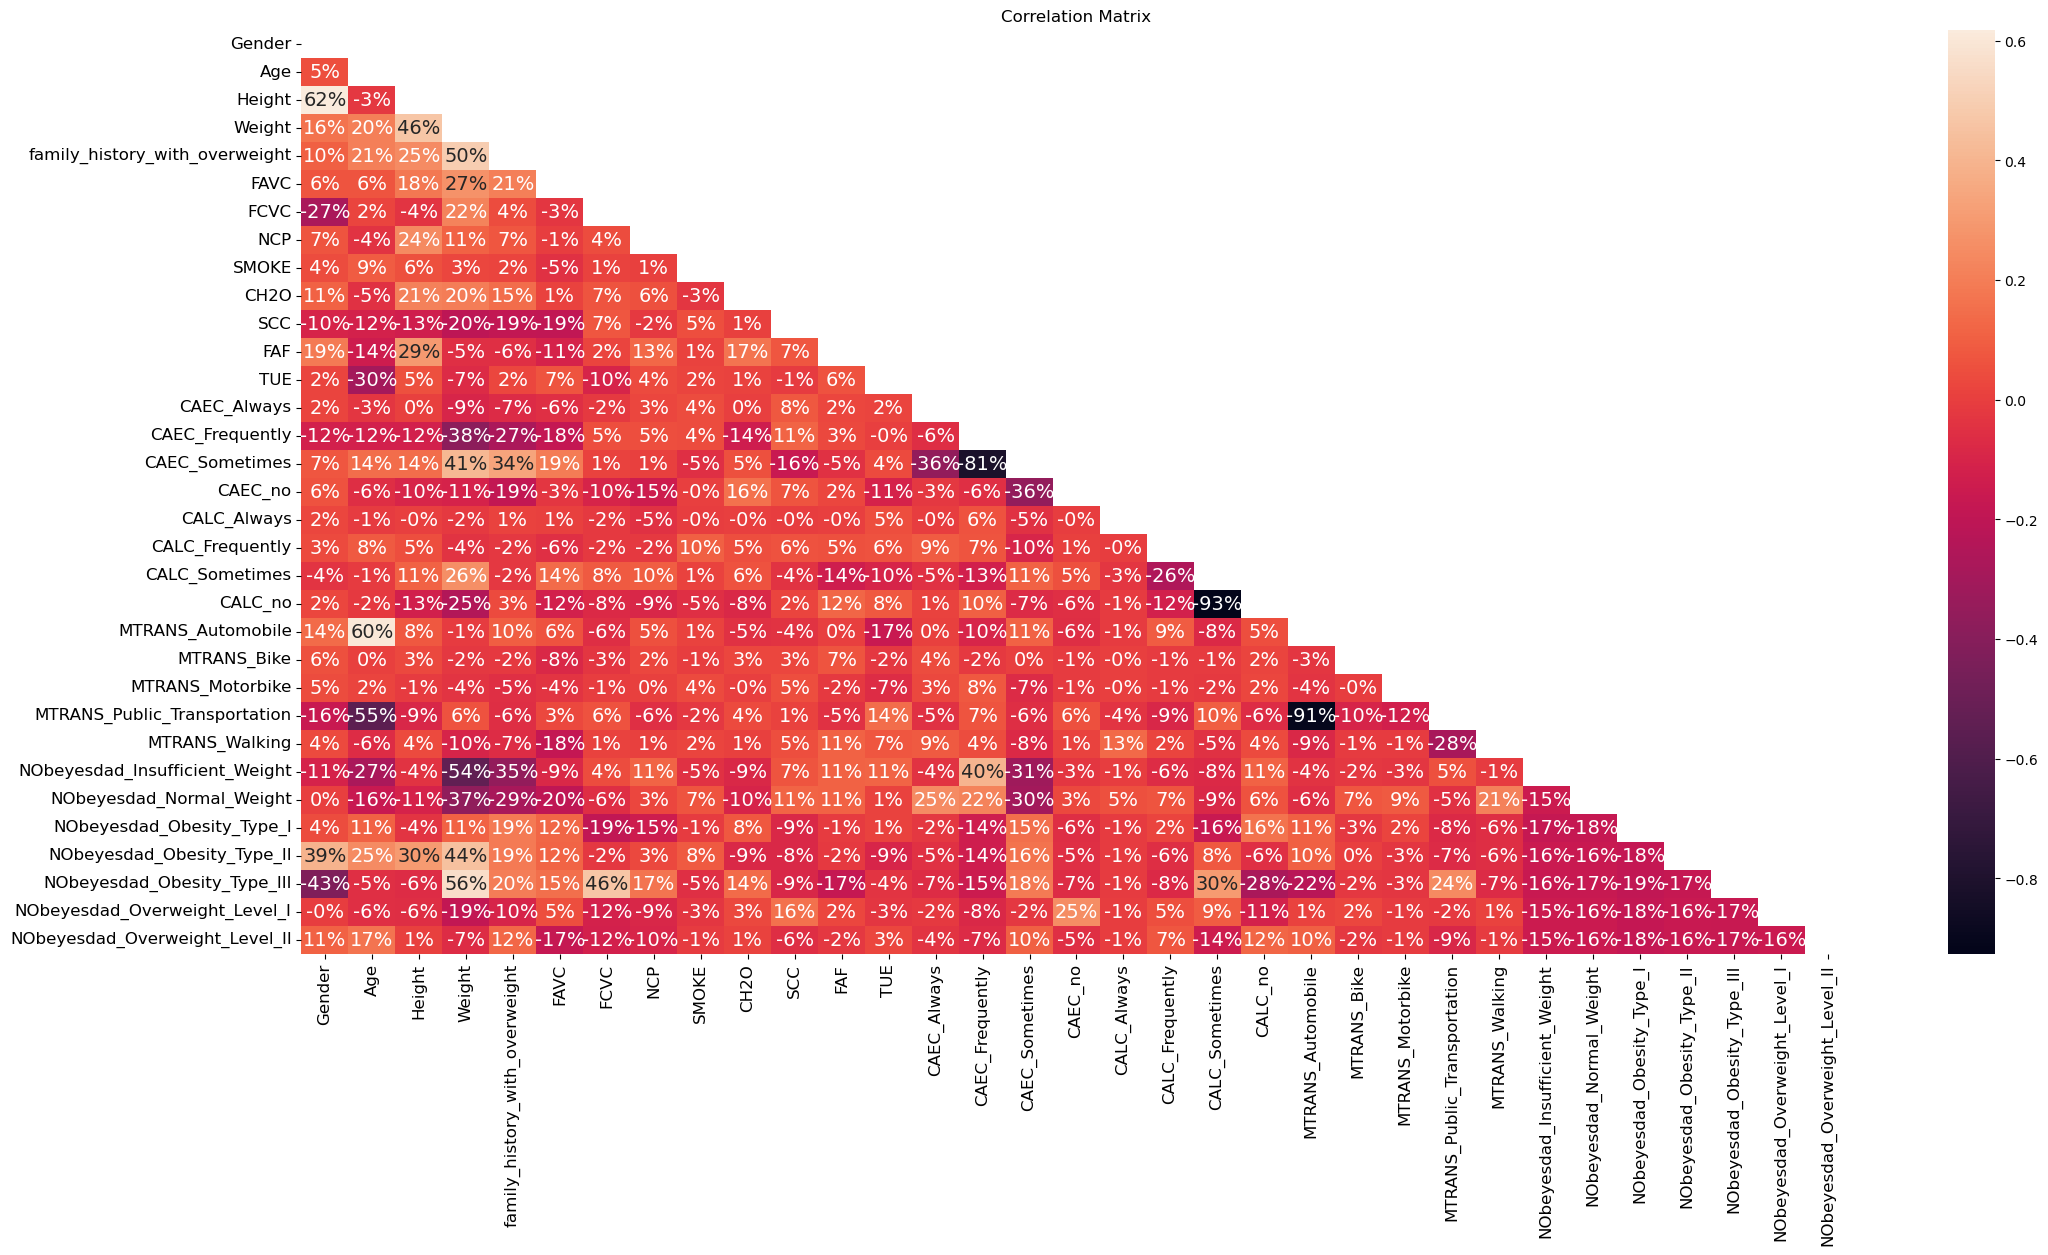

In [23]:
numeric_df = df1.select_dtypes(include=np.number)

Correlation  = numeric_df.corr()

mask = np.zeros_like(Correlation)
mask_check = np.triu_indices_from(mask)
mask[mask_check] = True

plt.figure(figsize = (25,12))
sns.heatmap(Correlation, mask = mask, annot = True, fmt = "0.0%", annot_kws = {"size" : "14"})
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.title("Correlation Matrix")
plt.show()

## Business Problem 1 : predicting Obesity Level based on the features we have

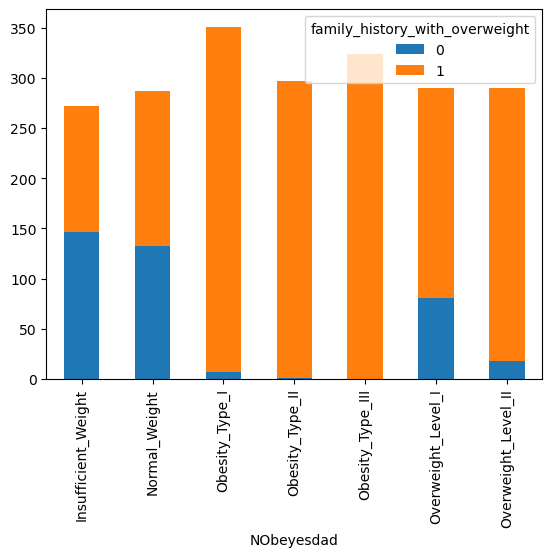

In [25]:
cross_tab = pd.crosstab(index=df['NObeyesdad'], columns=df['family_history_with_overweight'])
cross_tab.plot(kind="bar", stacked=True)
plt.show()

### we can conclude from the above plot that the persons having an obesity type one and above are most likely to have a family history with over weight 

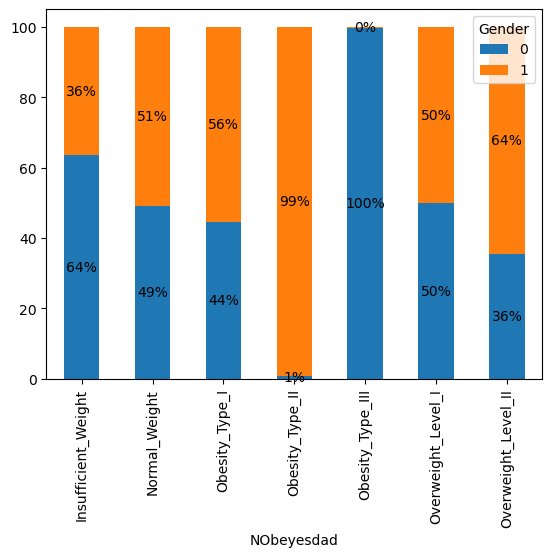

In [29]:
cross_tab = pd.crosstab(index=df['NObeyesdad'], columns=df['Gender'], normalize='index') * 100
ax = cross_tab.plot(kind="bar", stacked=True)

# Annotating bars with integer percentage values
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (x + width/2, y + height/2), ha='center', va='center')

plt.show()

### By analyzing the gender we can see that obesity type_II are almost all males and obesity type_III are almost all females and other types are about 50% males and 50% females, except for overweight level_II the males percent are more than females

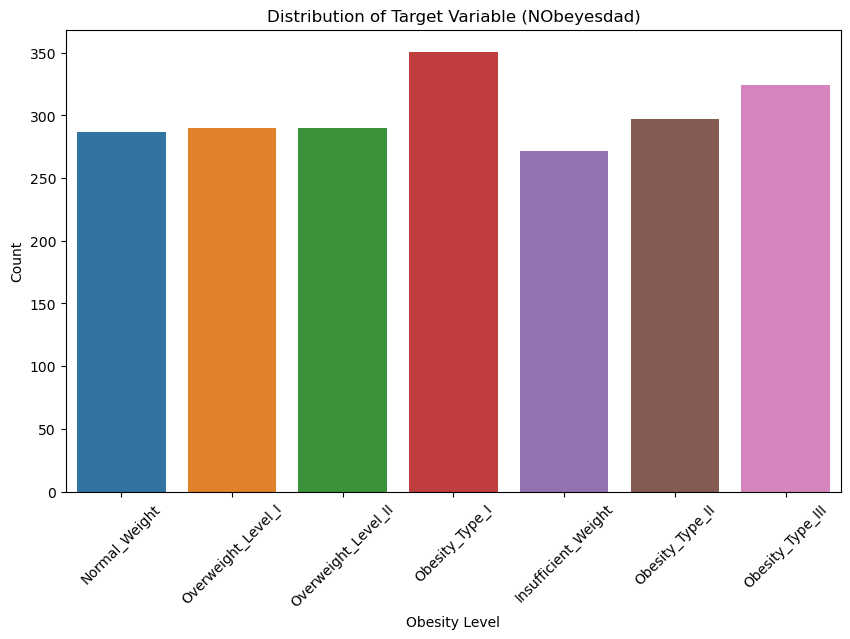

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribution of Target Variable (NObeyesdad)')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Train test split

In [76]:
# Making the target variable one dimentional array by labeling each category with a single number

y = df['NObeyesdad']

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_new = label_encoder.fit_transform(y)

# Get the mapping of encoded labels to original categories
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Print the mapping
print(label_mapping)

{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


In [77]:
# Define features (X) and target variable (y)
X = df1.drop(columns=['NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight', 
                     'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
                     'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
                     'NObeyesdad_Overweight_Level_II'])
y = y_new

In [79]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1477, 26)
Shape of X_test: (634, 26)
Shape of y_train: (1477,)
Shape of y_test: (634,)


## Train the support vector classifier with CV

In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [81]:
# Define the parameter grid for grid search
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
model = SVC()

In [82]:
# Create a grid search object
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

# Fit the grid search to the data
grid.fit(X_train,y_train)

# Print the best parameters found
print("Best Parameters:", grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.257 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.240 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.224 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.234 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.241 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.669 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.749 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.647 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.693 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.753 total time=   0.5s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.786 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.786 total time=   0.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.756 total time=   0.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.926 total time=   0.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.926 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.916 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.895 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.919 total time=   0.0s
[CV 4/5] END ....C=1000, gam

In [83]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [84]:
grid_predictions = grid.predict(X_test)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,grid_predictions))

[[81  5  0  0  0  0  0]
 [ 7 69  2  0  0 13  2]
 [ 0  1 99  0  1  0  1]
 [ 0  0  1 87  0  0  0]
 [ 0  1  0  0 97  0  0]
 [ 0  9  0  0  0 78  1]
 [ 0  4  6  0  0  2 67]]


In [86]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        86
           1       0.78      0.74      0.76        93
           2       0.92      0.97      0.94       102
           3       1.00      0.99      0.99        88
           4       0.99      0.99      0.99        98
           5       0.84      0.89      0.86        88
           6       0.94      0.85      0.89        79

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634



## Train the Random Forest model

In [89]:
from sklearn.ensemble import RandomForestClassifier


# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-2)

# Fit the model with training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best cross-validation score found
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.950581768208887


In [94]:
# Get the best estimator from the grid search
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set
rf_pred = best_rf_classifier.predict(X_test)

In [95]:
# Evaluate the model performance

print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[81  5  0  0  0  0  0]
 [ 2 85  0  0  0  4  2]
 [ 0  3 95  3  0  0  1]
 [ 0  0  1 87  0  0  0]
 [ 0  1  0  0 97  0  0]
 [ 0 13  0  0  0 72  3]
 [ 0  3  0  0  0  2 74]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        86
           1       0.77      0.91      0.84        93
           2       0.99      0.93      0.96       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.92      0.82      0.87        88
           6       0.93      0.94      0.93        79

    accuracy                           0.93       634
   macro avg       0.94      0.93      0.93       634
weighted avg       0.94      0.93      0.93       634



## Business Problem 2 : Identifying Factors Influencing Weight

In [103]:
df_new = df1[['Age', 'Height', 'Weight', 'family_history_with_overweight','FAVC', 'FCVC', 'CAEC_Always', 'CAEC_Frequently',
              'CAEC_Sometimes', 'CAEC_no', 'CH2O', 'SCC','CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
              'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
              'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
              'NObeyesdad_Overweight_Level_II']]

In [150]:
df_new.describe()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,CALC_Frequently,CALC_Sometimes,CALC_no,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,0.025107,0.114638,0.836097,0.024159,...,0.033160,0.663667,0.302700,0.128849,0.135955,0.166272,0.140692,0.153482,0.137376,0.137376
std,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.156486,0.318660,0.370276,0.153580,...,0.179096,0.472566,0.459535,0.335112,0.342821,0.372413,0.347786,0.360537,0.344325,0.344325
min,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\archi\AppData\Local\Temp\ipykernel_17008\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

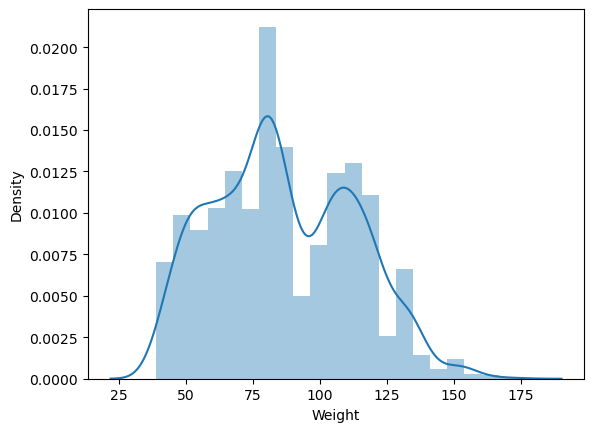

In [128]:
sns.distplot(df['Weight'])

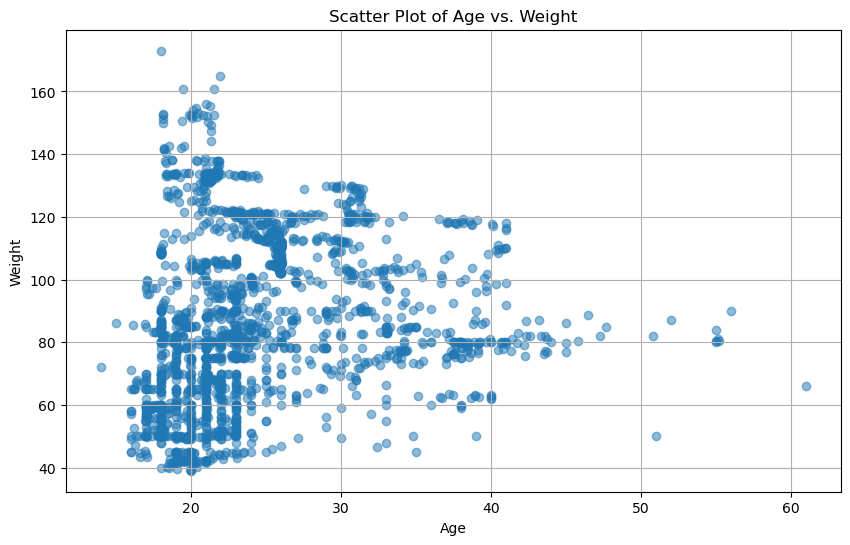

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Weight'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

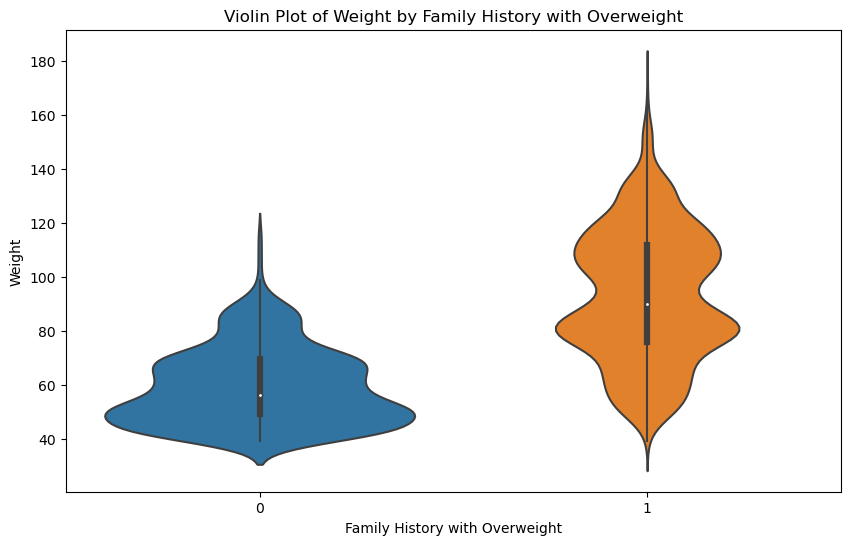

In [105]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='family_history_with_overweight', y='Weight', data=df)
plt.title('Violin Plot of Weight by Family History with Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Weight')
plt.show()

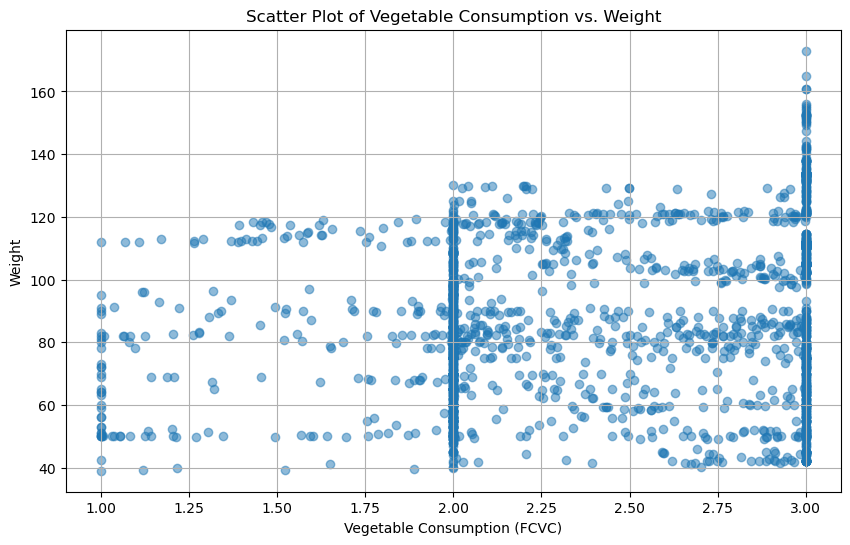

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(df['FCVC'], df['Weight'], alpha=0.5)
plt.title('Scatter Plot of Vegetable Consumption vs. Weight')
plt.xlabel('Vegetable Consumption (FCVC)')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

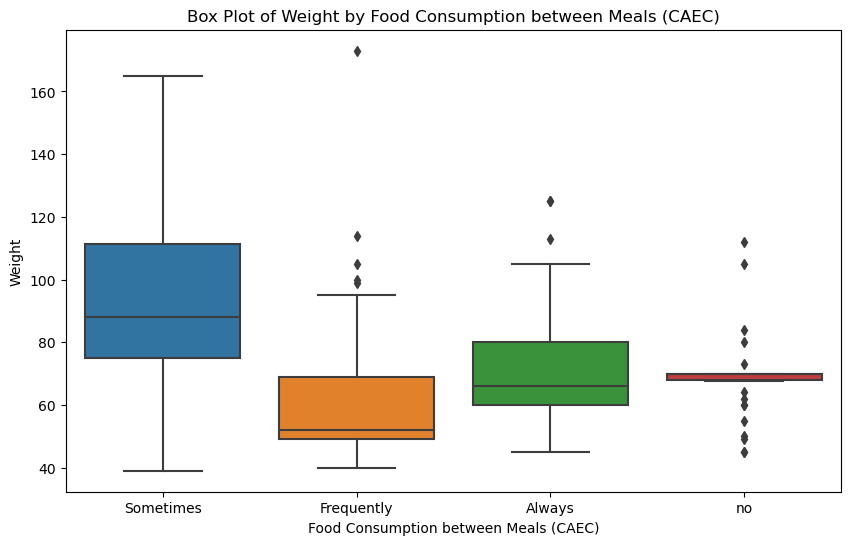

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CAEC', y='Weight', data=df)
plt.title('Box Plot of Weight by Food Consumption between Meals (CAEC)')
plt.xlabel('Food Consumption between Meals (CAEC)')
plt.ylabel('Weight')
plt.show()

### Train test split

In [130]:
X = df_new.drop(columns=['Weight'])
y = df_new['Weight']

In [131]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Apply Linear Regression Model

In [132]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [133]:
model1.fit(X_train, y_train)

LinearRegression()

In [141]:
print(model1.intercept_)

-81.34118909964995


In [140]:
coeff_df = pd.DataFrame(model1.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Age,-0.059312
Height,98.157452
family_history_with_overweight,-0.594764
FAVC,-0.415276
FCVC,0.330999
CAEC_Always,-0.950890
CAEC_Frequently,1.434452
CAEC_Sometimes,-0.822395
CAEC_no,0.338833
CH2O,0.513407


In [135]:
y_pred1 = model1.predict(X_test)

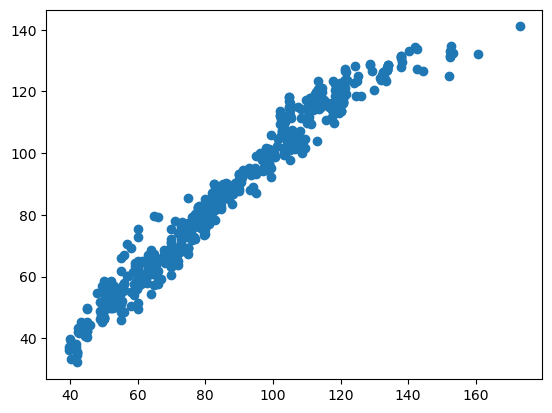

In [137]:
plt.scatter(y_test,y_pred1)

C:\Users\archi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


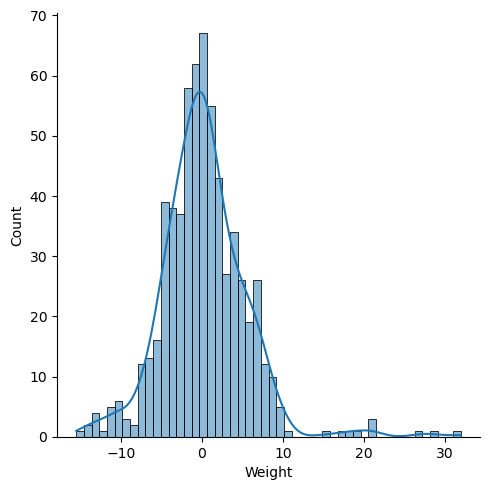

In [144]:
# Risidual Histogram
sns.displot(y_test-y_pred1, bins=50, kde=True)

In [147]:
from sklearn import metrics


print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("R-squared:", metrics.r2_score(y_test, y_pred1))

MSE: 27.28390498956234
RMSE: 5.223399753949753
R-squared: 0.961853630247939


### Applying a Descision Tree Model

In [155]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
Model2 = DecisionTreeRegressor(random_state=42)

In [159]:
Model2.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [161]:
y_pred_tree = Model2.predict(X_test)

In [163]:
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred_tree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))
print("R-squared:", metrics.r2_score(y_test, y_pred_tree))

Mean Squared Error (MSE): 12.241027147584143
RMSE: 3.498717929125488
R-squared: 0.9828854869603381


In [168]:
# Tree Visualization

import six
from sklearn.tree import plot_tree 

features = list(df_new.columns[1:])
features

['Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'CAEC_Always',
 'CAEC_Frequently',
 'CAEC_Sometimes',
 'CAEC_no',
 'CH2O',
 'SCC',
 'CALC_Always',
 'CALC_Frequently',
 'CALC_Sometimes',
 'CALC_no',
 'NObeyesdad_Insufficient_Weight',
 'NObeyesdad_Normal_Weight',
 'NObeyesdad_Obesity_Type_I',
 'NObeyesdad_Obesity_Type_II',
 'NObeyesdad_Obesity_Type_III',
 'NObeyesdad_Overweight_Level_I',
 'NObeyesdad_Overweight_Level_II']

In [174]:
from sklearn.tree import plot_tree

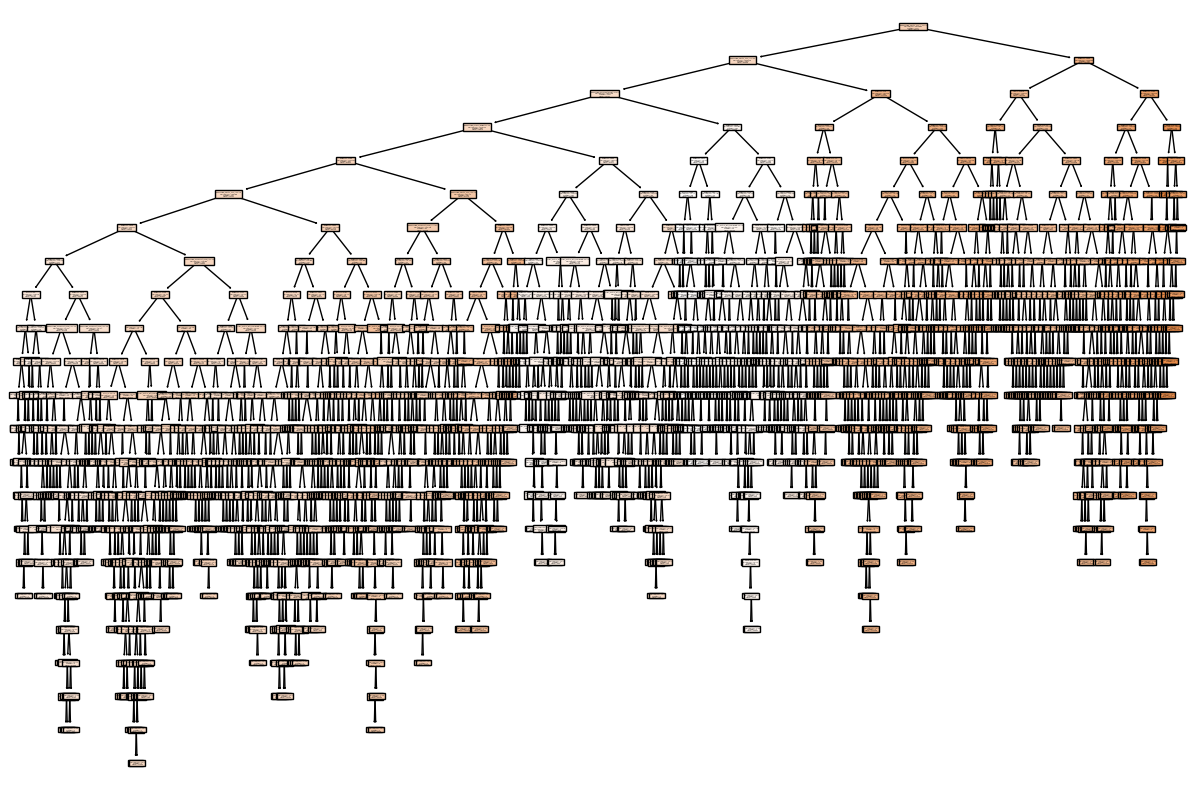

In [177]:
plt.figure(figsize=(15, 10))
plot_tree(Model2, feature_names=list(X.columns), filled=True)
plt.show()

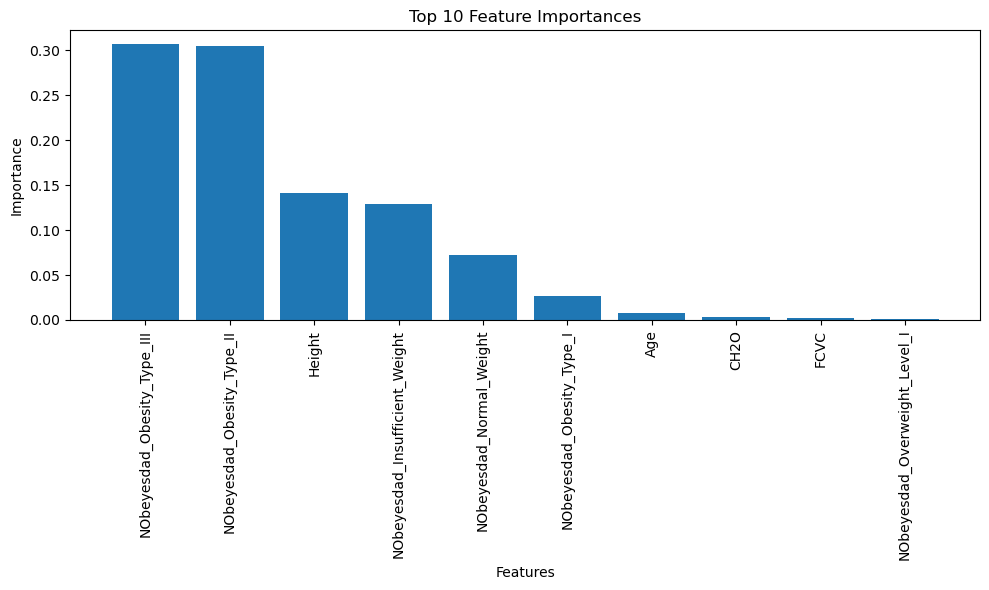

In [179]:
# Since the above tree is very hard to recognize I will plot out the top 10 important features

importances = Model2.feature_importances_
indices = np.argsort(importances)[::-1][:10]  # Select the indices of the top 10 features

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices], align="center")
plt.xticks(range(10), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()